In [ ]:
 #Numpy -> to perform the mathematical operation
import numpy as np
#  Pandas -> data manipulation tool
import pandas as pd
# matplotlib-> data visualisation tool
import matplotlib.pyplot as plt
 # SEaborn -> data visualisation tool
import seaborn as sns
# sqllite -> Server -less database
import re
import json
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
199,1,30,137,83


In [ ]:
df.shape
# if we have low amount of datpoint
#how can we enlarge the present datapoint to train our model

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Conclusions
1.No null value
2,Gender has the datatype is object

In [ ]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# Conclusions
1. Avg age of customer is 30
2. customer that visits the mall is having the age between 18 to 70
3.having the avg annual income is 50k


<Axes: xlabel='Age', ylabel='count'>

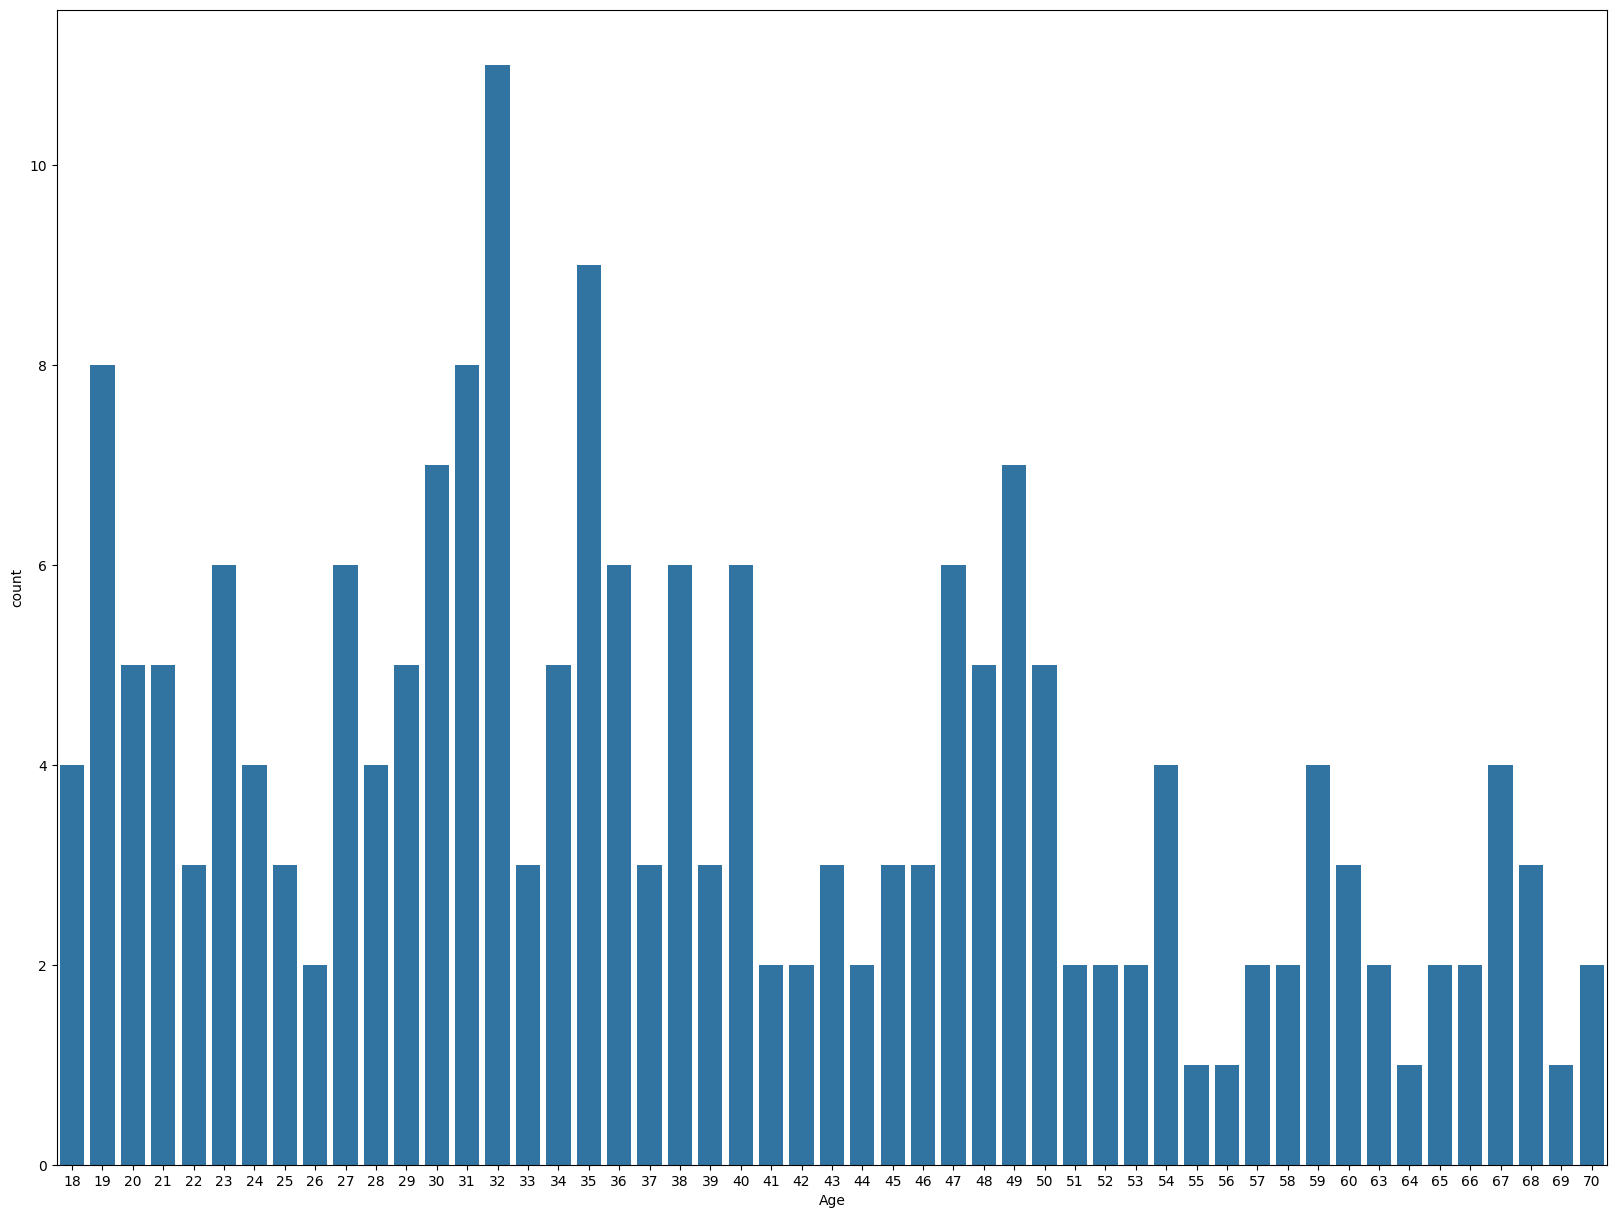

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x="Age")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


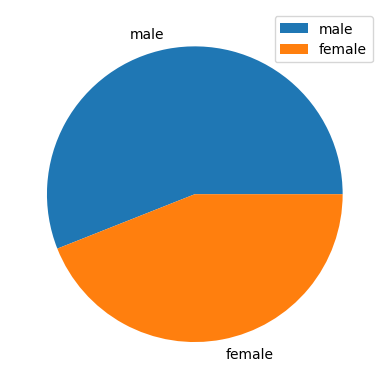

In [ ]:
# how many person of male and female visits the mall the help of a plot
plt.pie(df["Gender"].value_counts(),labels=['male','female'])
plt.legend()

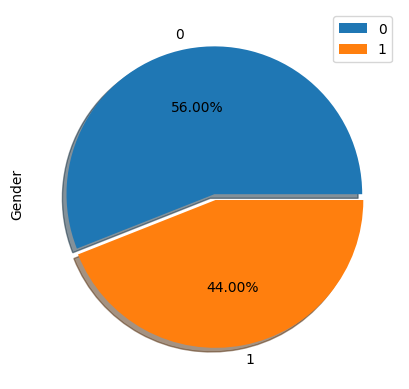

In [ ]:
#plt.bar(df.Gender)
df.Gender.value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, explode=(0,0.04))
plt.legend()

#conclusions

Female is more than male

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(df['Annual Income (k$)'],data==df)
plt.title("Distribution of annual income")

NameError: name 'data' is not defined

<Figure size 2000x700 with 0 Axes>

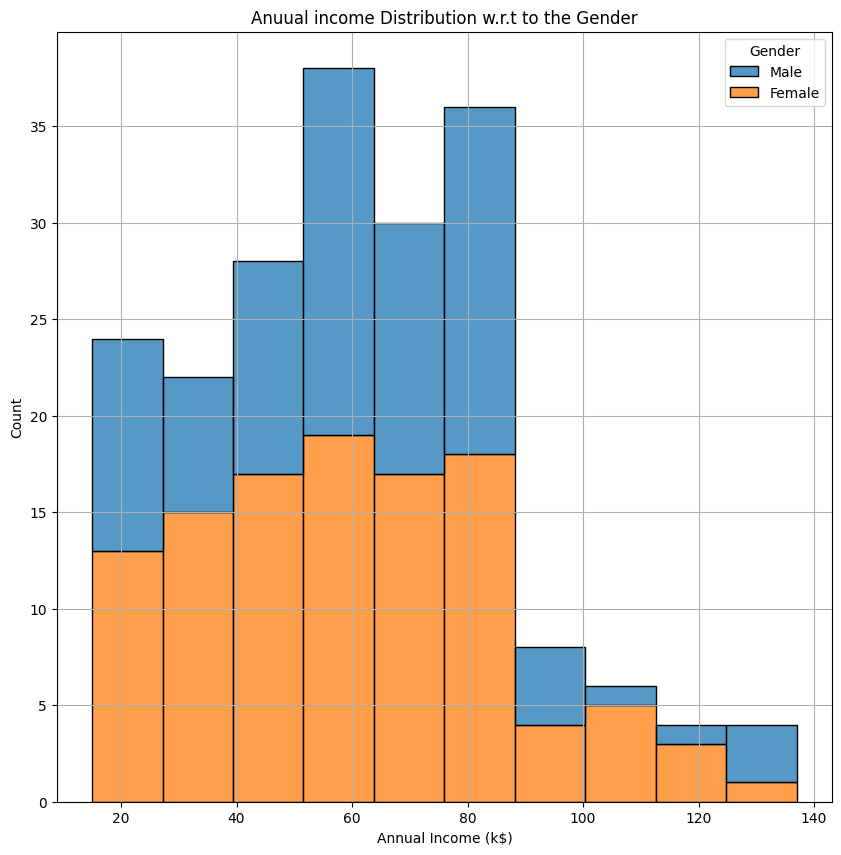

In [ ]:
# show the annual income distribution with rto the gender
plt.figure(figsize=(10,10))
sns.histplot(df,x='Annual Income (k$)',hue="Gender", multiple='stack')
plt.title("Anuual income Distribution w.r.t to the Gender")
plt.grid()

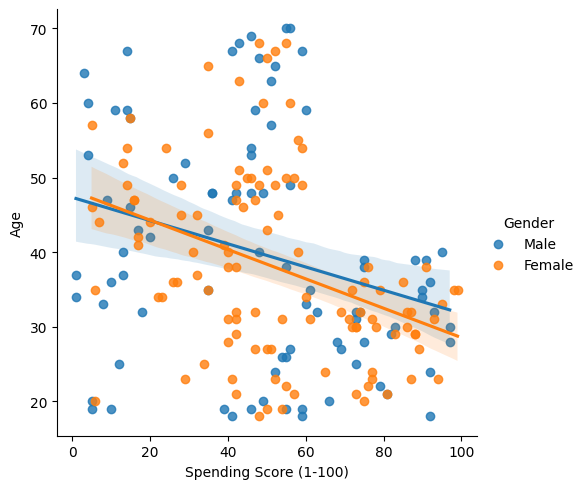

In [ ]:
sns.lmplot(data=df,x='Spending Score (1-100)',y='Age',hue='Gender')

# Machine learing


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc=LabelEncoder()

In [ ]:
df.Gender=enc.fit_transform(df.Gender)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
ssd=[]
for i in range(1,11):
  Kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_)

In [ ]:
ssd

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75421.38291301335,
 58348.641363315044,
 51132.703212576904,
 44391.82080487078,
 40942.36051171052,
 37476.21325286407]

Text(0.5, 1.0, 'Elbow plot')

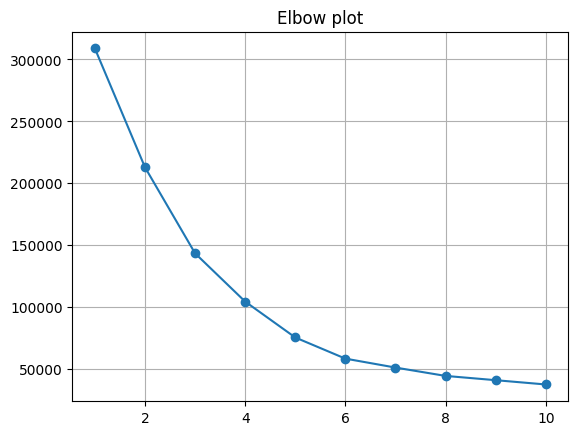

In [ ]:
plt.plot(range(1,11),ssd, marker='o')
plt.grid()
plt.title('Elbow plot')

Prediction


In [ ]:
Kmodel=KMeans(n_clusters=6)

In [ ]:
Kmodel.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
prediction=Kmodel.predict(df)

In [ ]:
prediction

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 0,
       5, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 4, 0, 4, 3, 4, 3, 4, 3, 4,
       0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [ ]:
Kmodel.cluster_centers_

array([[ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [ ]:
df['Cluster']=prediction

In [ ]:
sns.color_palette(None,len(np.unique(prediction)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

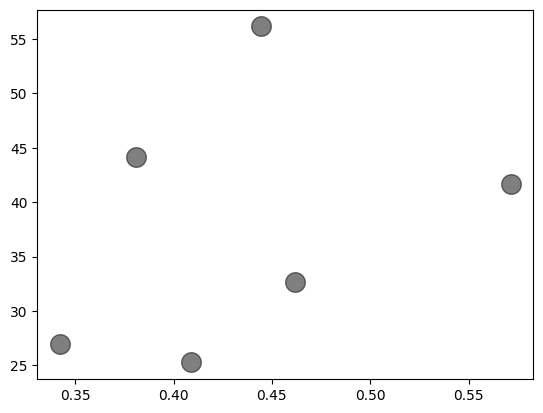

In [ ]:
plt.scatter(Kmodel.cluster_centers_[:,0],Kmodel.cluster_centers_[:,1],c='black',s=200,alpha=0.5)

In [ ]:
plt.scatter([]sns.color_palette(None,len(np.unique(prediction))))

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
var=linkage(df,method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342

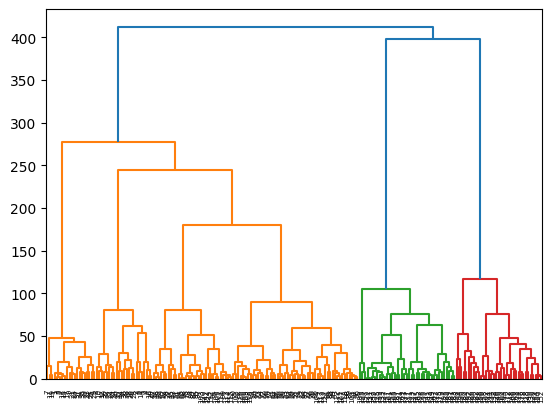

In [ ]:
dendrogram(var,leaf)